In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [2]:
# 데이터를 읽어온다.
df1 = pd.read_csv('./data/wine.csv', header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
# 입력과 결과로 나눈다.
X = df1.drop(12, axis=1)
y = df1[12]

In [4]:
# 결과 데이터의 종류 수를 파악한다.
len(y.value_counts())

2

In [5]:
# 표준화
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
display(X)

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

In [6]:
# 2진 분류 옵션들
out_nodes = 1
loss_function = 'binary_crossentropy'
activation_function = 'sigmoid'

# 다중 분류 옵션들
# out_nodes = len(y.value_counts())
# loss_function = 'categorical_crossentropy'
# activation_function = 'softmax'

# 회귀
# 출력 결과를 하나만 뽑아서 Series로 나왔다면...
# 1로 설정한다.
# if type(y) is pd.core.series.Series:
#     out_nodes = 1
# else : 
#     out_nodes = y.shape[1]
    
# loss_function = 'mean_squared_error'

In [7]:
# 입력노드의 개수
# 입력 데이터 행 하나의 컬럼의 개수
input_size = X.shape[1]
input_size

12

In [8]:
# 신경망 설계
model = Sequential()

model.add(Dense(30, input_dim=input_size))
model.add(Activation('relu'))

model.add(Dense(12))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dense(out_nodes))
model.add(Activation(activation_function))

In [9]:
# 모델 컴파일
model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 activation (Activation)     (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 activation_1 (Activation)   (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 activation_2 (Activation)   (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [10]:
# 학습
# validation_split : 주어진 데이터에서 사용할 검증데이터 비율
history = model.fit(X, y, epochs=2000, batch_size=10, validation_split=0.2)

Epoch 1/2000
520/520 [==============================] - 3s 3ms/step - loss: 0.1438 - accuracy: 0.9640 - val_loss: 0.0196 - val_accuracy: 0.9938
Epoch 2/2000
520/520 [==============================] - 2s 3ms/step - loss: 0.0317 - accuracy: 0.9933 - val_loss: 0.0102 - val_accuracy: 0.9985
Epoch 3/2000
520/520 [==============================] - 2s 3ms/step - loss: 0.0254 - accuracy: 0.9940 - val_loss: 0.0094 - val_accuracy: 0.9985
Epoch 4/2000
520/520 [==============================] - 2s 3ms/step - loss: 0.0217 - accuracy: 0.9952 - val_loss: 0.0091 - val_accuracy: 0.9992
Epoch 5/2000
520/520 [==============================] - 2s 4ms/step - loss: 0.0191 - accuracy: 0.9960 - val_loss: 0.0060 - val_accuracy: 0.9992
Epoch 6/2000
520/520 [==============================] - 2s 4ms/step - loss: 0.0175 - accuracy: 0.9963 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 7/2000
520/520 [==============================] - 2s 4ms/step - loss: 0.0168 - accuracy: 0.9962 - val_loss: 0.0041 - val_accuracy:

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
# 리스트를 추출한다.
loss_list = history.history['loss']
accuracy_list = history.history['accuracy']
val_loss_list = history.history['val_loss']
val_accuracy_list = history.history['val_accuracy']

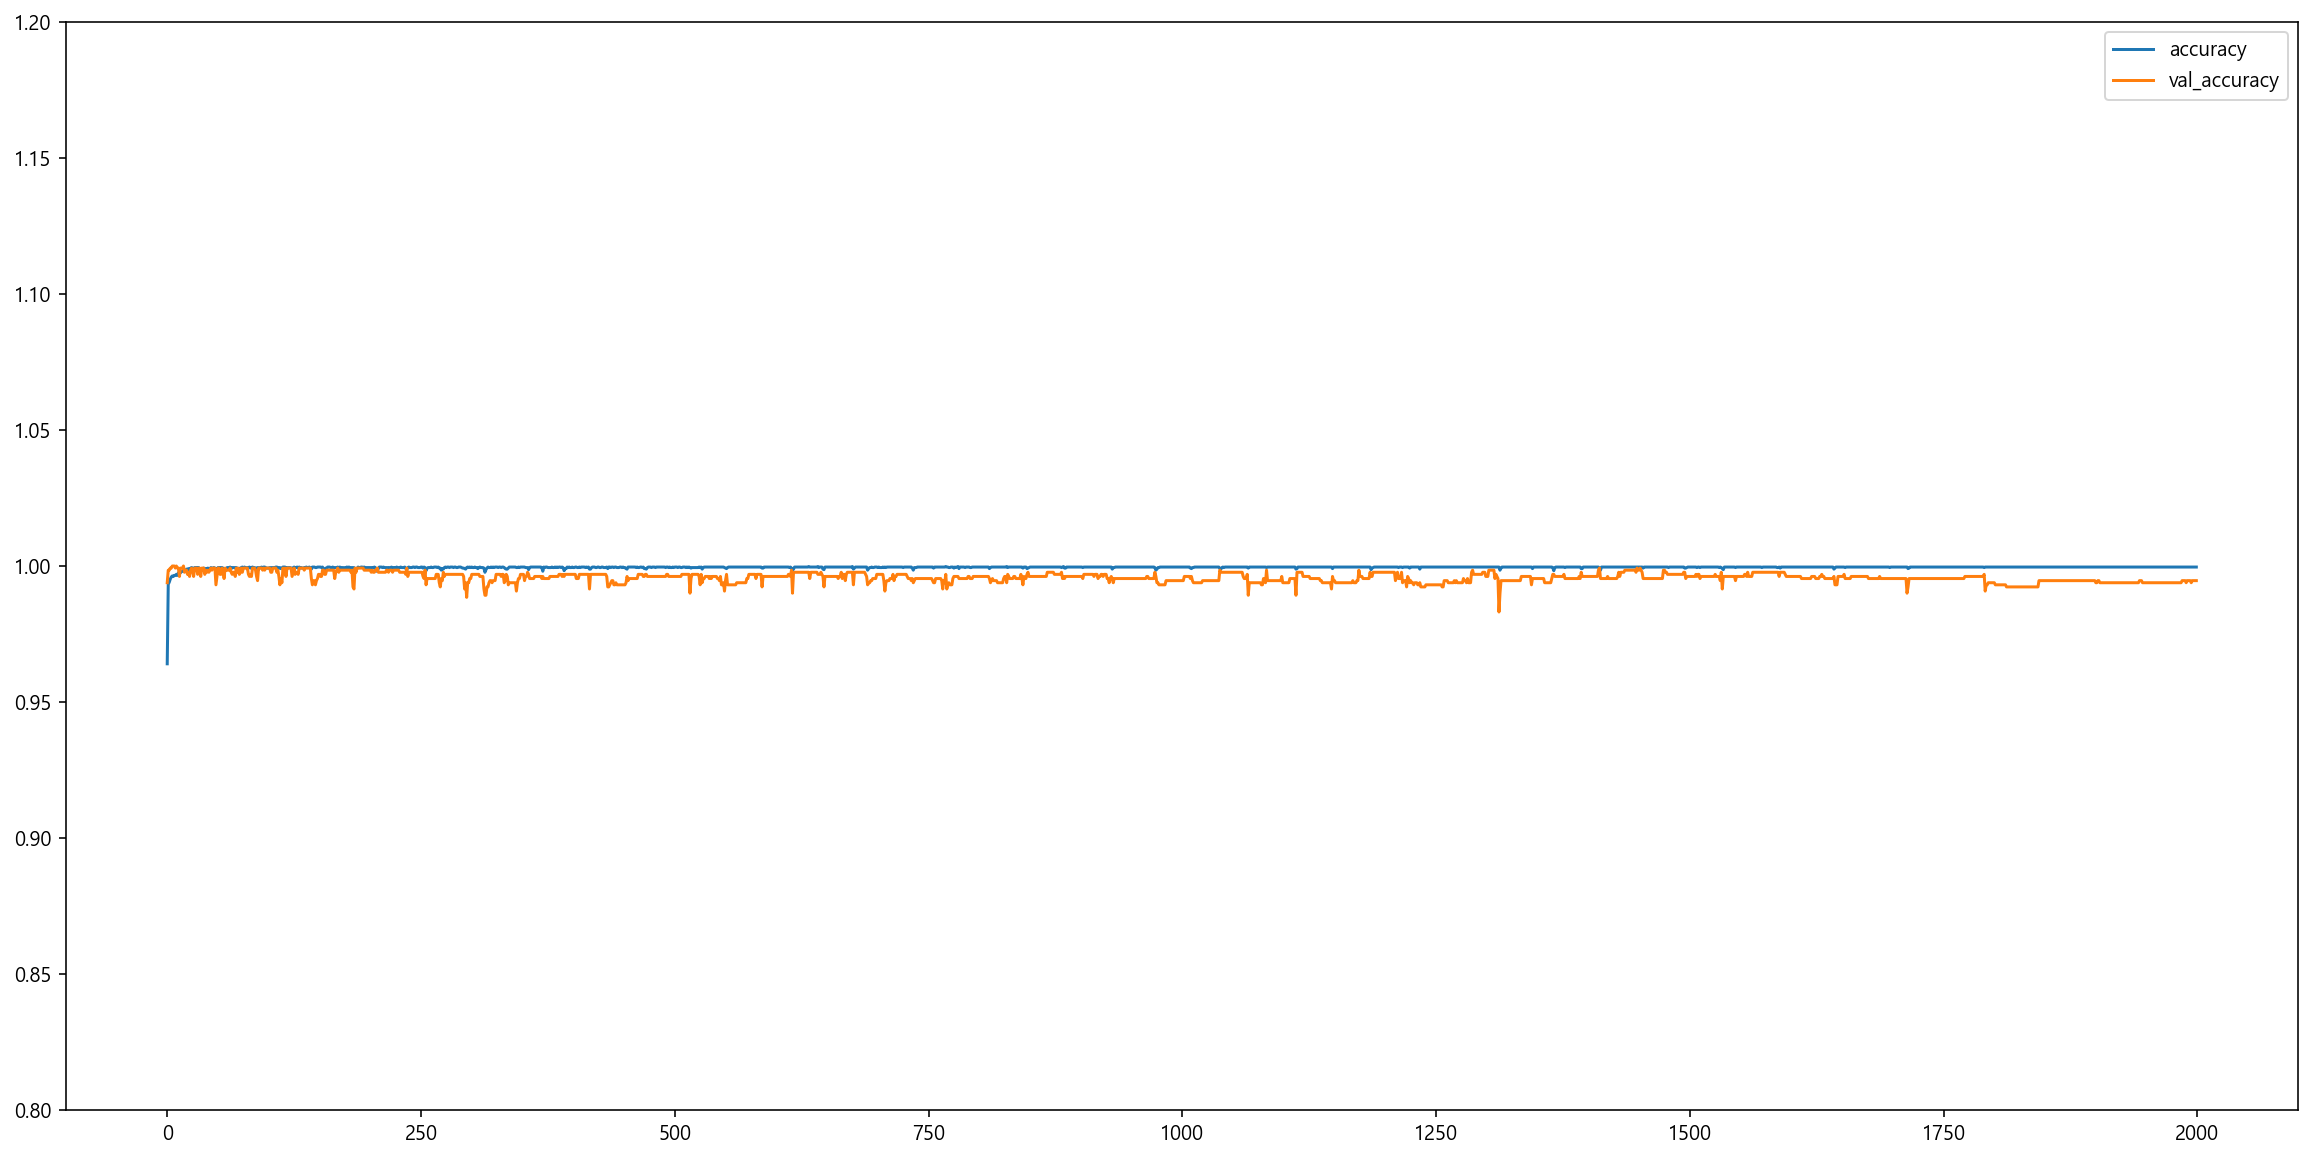

In [17]:
# 정확도 그래프
plt.figure(figsize=(20,10))
plt.plot(accuracy_list, label='accuracy')
plt.plot(val_accuracy_list, label = 'val_accuracy')
plt.legend()
plt.ylim(0.8, 1.2)
plt.show()

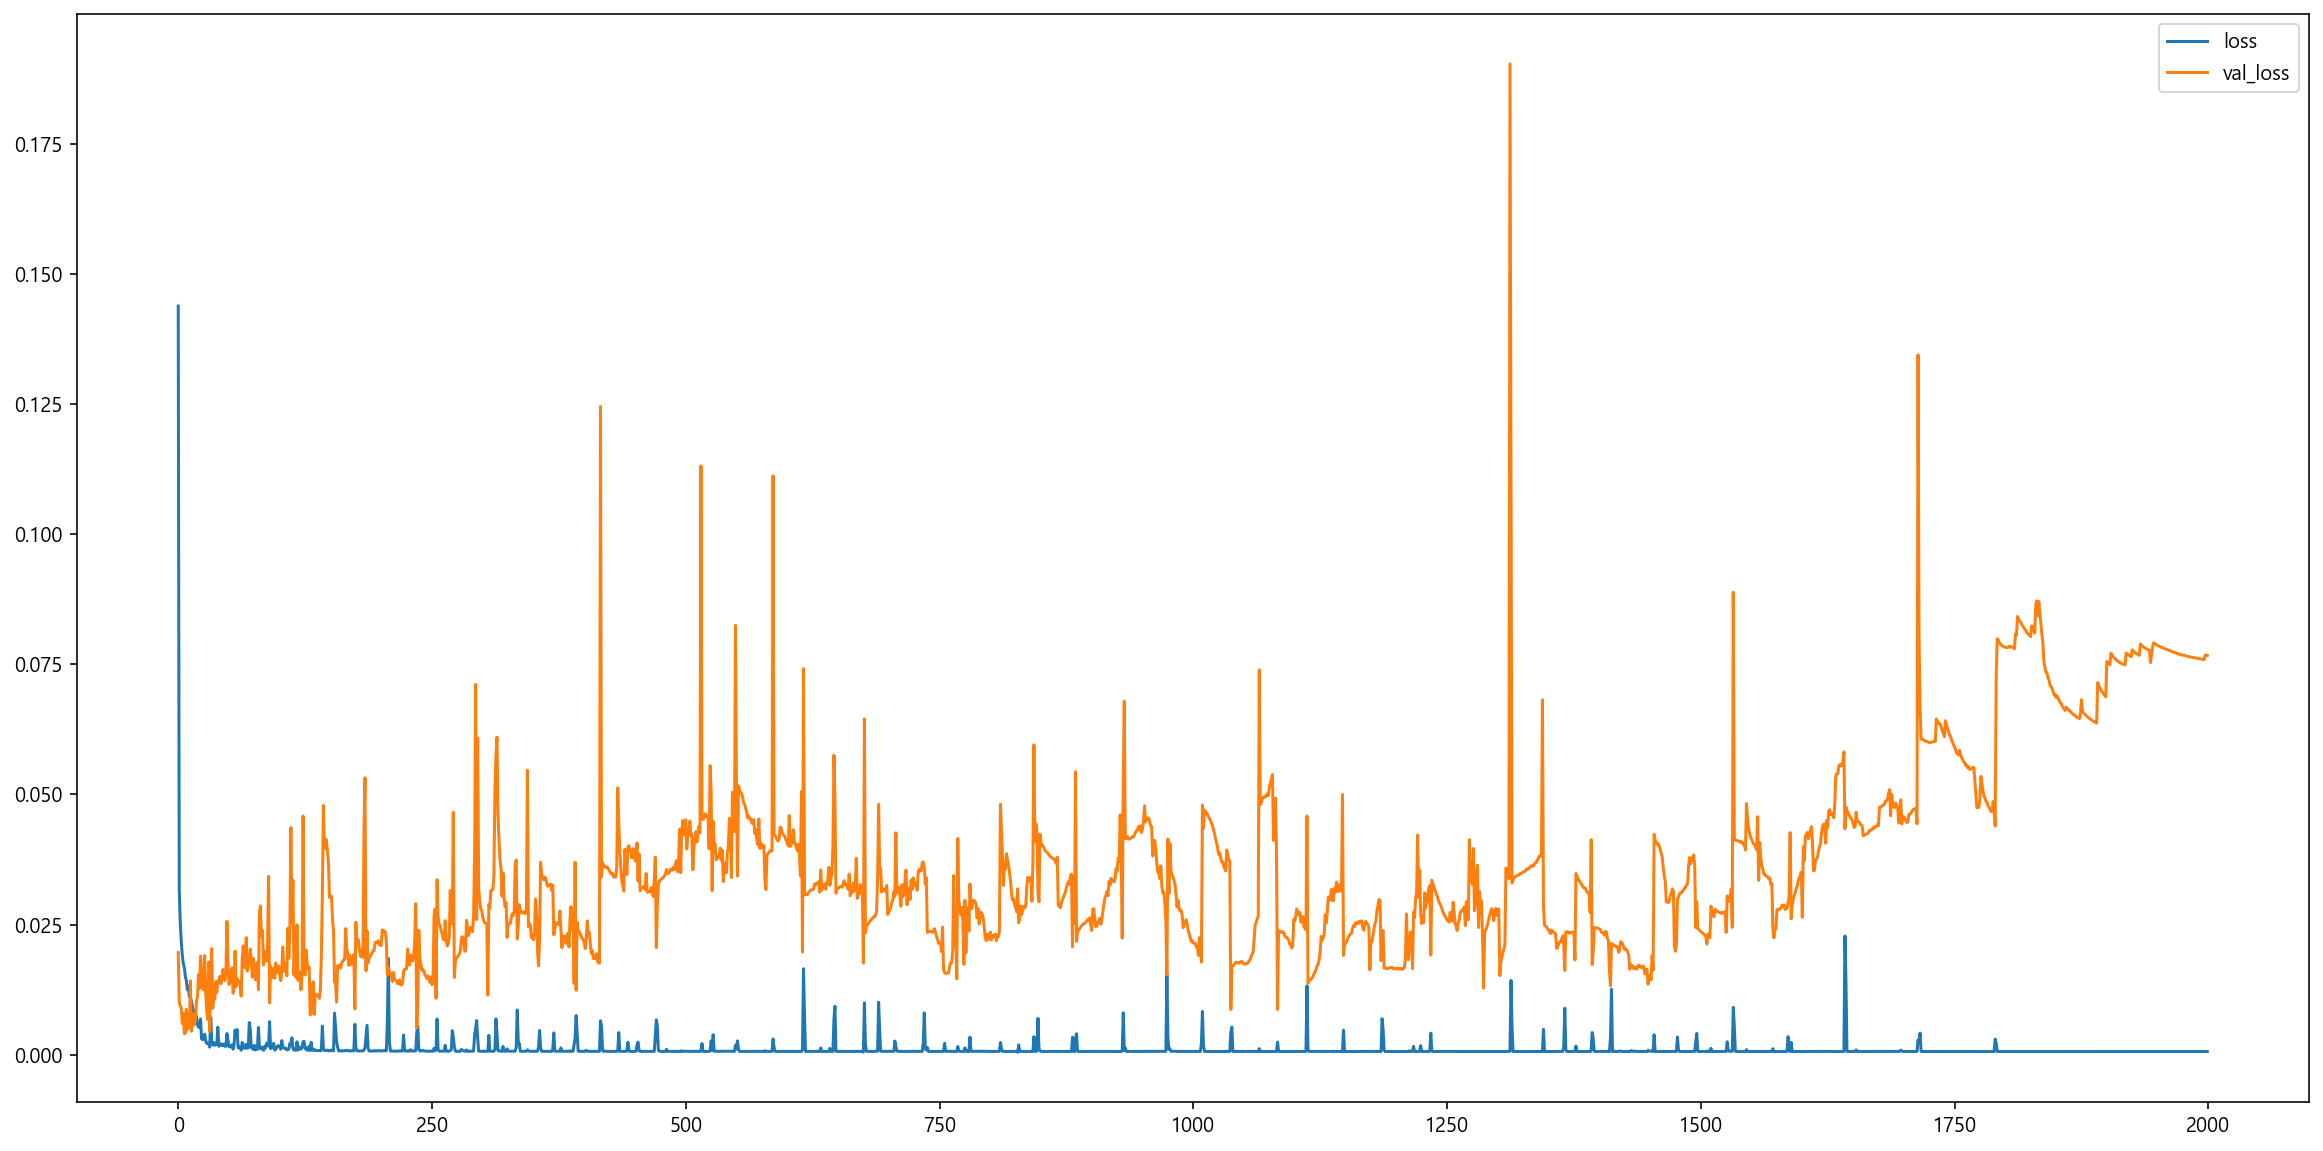

In [20]:
# 정확도 그래프
plt.figure(figsize=(20,10))
plt.plot(loss_list, label='loss')
plt.plot(val_loss_list, label = 'val_loss')
plt.legend()
plt.show()